# Assignment #5

# 1. Distance between two points (25 points)

In homework 2, we found using the spherical law of cosines, that the arc length between Durham and Chicago is 998.233 km. If we first project the geographical coordinates of the two cities onto a 2d plane, we should, in principle, be able to use the euclidean distance to calculate the distance between the two cities. Using this approach, calculate the distance between Durham and Chicago using the following three map projections. Provide a one paragraph explanation of how the computed distances differ.

* Oblique Azimuthal equidistant
* Mercator
* Cylindrical Equal Area

Items to keep in mind:
* Only Numpy can be used for this problem. The use of other geospatial software or libraries will not be accepted.
* The forward transformations for the three projections can be found in the book "Map Projections--A Working Manual" which is included in the folder "Other" in the GitHub repository under the filename "Snyder1987.pdf".
* The geographic coordinates of Durham, NC are 35.9940$^o$ N and 78.8986$^o$ W. The coordinates of Chicago, IL are 41.8781$^o$ N and 87.6298$^o$ W.


In [1]:
import numpy as np

dlat = 35.9940*np.pi/180
dlon = -78.8986*np.pi/180
clat = 41.8781*np.pi/180
clon = -87.6298*np.pi/180
R = 6378.1

#Oblique Azimuthal equidistant
cosc1 = np.sin(dlat)*np.sin(0)+np.cos(dlat)*np.cos(0)*np.cos(dlon-0)
c1 = np.arccos(cosc1)
k1 = c1/np.sin(c1)
x1 = R*k1*np.cos(dlat)*np.sin(dlon-0)
y1 = R*k1*(np.cos(0)*np.sin(dlat)-np.sin(0)*np.cos(dlat)*np.cos(dlon-0))
cosc2 = np.sin(clat)*np.sin(0)+np.cos(clat)*np.cos(0)*np.cos(clon-0)
c2 = np.arccos(cosc2)
k2 = c2/np.sin(c2)
x2 = R*k2*np.cos(clat)*np.sin(clon-0)
y2 = R*k2*(np.cos(0)*np.sin(clat)-np.sin(0)*np.cos(clat)*np.cos(clon-0))
dx = x2 - x1
dy = y2 - y1
dist1 = (dx**2+dy**2)**(1/2)
print('Oblique Azimuthal equidistant:', dist1, 'km')

#Mercator
x1 = R*(dlon-0)
x2 = R*(clon-0)
y1 = (R/2)*np.log((1+np.sin(dlat))/(1-np.sin(dlat)))
y2 = (R/2)*np.log((1+np.sin(clat))/(1-np.sin(clat)))
dx = x2 - x1
dy = y2 - y1
dist2 = (dx**2+dy**2)**(1/2)
print('Mercator:', dist2, 'km')

#Cylinder Equal Area
x1 = R*(dlon-0)*np.cos(0)
x2 = R*(clon-0)*np.cos(0)
y1 = R*(np.sin(dlat)/np.cos(0))
y2 = R*(np.sin(clat)/np.cos(0))
dx = x2 - x1
dy = y2 - y1
dist3 = (dx**2+dy**2)**(1/2)
print('Cylindrical Equal Area', dist3, 'km')

print('The computed distance using three different methods are slightly different. And the reason for this is that the three different methods use different method to calculate the area of the earth. This means they have different interpretations on earth surface area.')

Oblique Azimuthal equidistant: 1194.261699263629 km
Mercator: 1286.554524834618 km
Cylindrical Equal Area 1097.2886661696466 km
The computed distance using three different methods are slightly different. And the reason for this is that the three different methods use different method to calculate the area of the earth. This means they have different interpretations on earth surface area.


# 2. Calculating the correct spatial mean (25 pts)

A simple spatial mean of a regular lat/long grid (Plate Carree) can lead to large discrepancies in the estimated spatial mean. To assess this impact, we are going to use the variable `t2m` in the annual ERA-Interim database (`/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann`). Start by assembling an array of actual area per pixel and then compute for each year the area weighted mean. Then compare the resulting time series to that resulting from using the equally weighted spatial mean (i.e., naive approach). Provide an explanation of your results.

In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime

file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann'
fp = nc.Dataset(file)
t2m = fp['t2m']
times = fp['time']
data = fp['t2m'][:]
lats = fp['lat'][:]
lons = fp['lon'][:]
meana = []
temp = []
Re = 6378.1
dates = nc.num2date(times[:],units=times.units,calendar=times.calendar)

for ilat in range(len(lats)-1):
    for ilon in range(len(lons)-1):
        lat1 = lats[ilat]*np.pi/180
        lon1 = lons[ilon]*np.pi/180
        lat2 = lats[ilat + 1]*np.pi/180
        lon2 = lons[ilon + 1]*np.pi/180
        meana.append(Re**2*np.abs(np.sin(lat1)-np.sin(lat2))*np.abs(lon1-lon2))

for time in range(len(times)):
    for ilat in range(len(lats)-1):
        for ilon in range(len(lons)-1):
            temp.append(data[time, ilat, ilon]+data[time, ilat+1,ilon]+data[time,ilat,ilon+1]+data[time,ilat+1,ilon+1])

meana = np.array(meana).reshape(len(lats)-1, len(lons)-1)
temp = np.array(temp).reshape(len(times), len(lats)-1, len(lons)-1)

totala = np.sum(meana)
meanarea = totala/((len(lats)-1)*len(lons)-1)

final = []
for time in range(len(times)):
    final.append(np.sum(temp[time, :, :]*meana[:, :])/totala)
#print(final)

naive = []
for time in range(len(times)):
    naive.append(np.sum(temp[time, :, :]*meanarea)/(totala))
#print(naive)

Based on the plot, it can be concluded that the values of the area weighted means are always higher than the equally weighted means through the whole time series, and the reason for this is that the precipitations mostly happen at the middle/center part of earth, and if area weighted method is used, the area of the middle/center part would be weighted more than all the other area on earth, and under this situation, the value of area weighted mean, which can be indicated by the mutiple of area and precipitation, would be big.


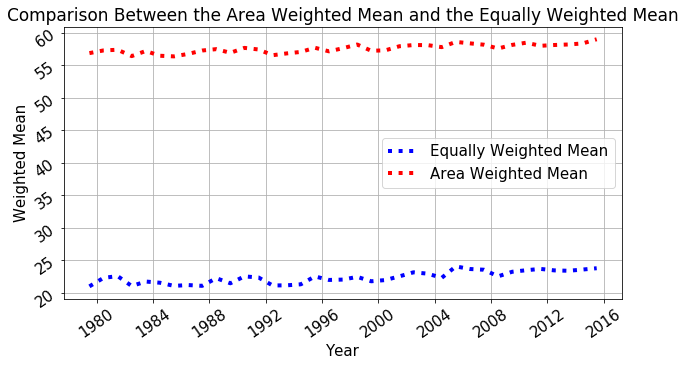

In [9]:
plt.figure(figsize = (10, 5))
plt.plot(dates, naive, color="blue", linewidth=4, linestyle=":")
plt.plot(dates, final, color="red", linewidth=4, linestyle=":")
plt.xticks(fontsize=15,rotation=35)
plt.yticks(fontsize=15,rotation=35)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Weighted Mean',fontsize=15)
plt.grid('on')
plt.legend(['Equally Weighted Mean', 'Area Weighted Mean'], fontsize = 15)
plt.title('Comparison Between the Area Weighted Mean and the Equally Weighted Mean', fontsize = 17)

print('Based on the plot, it can be concluded that the values of the area weighted means are always higher than the equally weighted means through the whole time series, and the reason for this is that the precipitations mostly happen at the middle/center part of earth, and if area weighted method is used, the area of the middle/center part would be weighted more than all the other area on earth, and under this situation, the value of area weighted mean, which can be indicated by the mutiple of area and precipitation, would be big.')

# 3. Reprojecting a reprojection (25 pts)

Extract the bounding box defined below from the NED elevation dataset ('/data/NED/NED.vrt') at a 0.01 arcdegree spatial resolution to a file named "dem_subset.tif". Then reproject the resulting file to a global Mollweide projection ("+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs") at a 2000 meter spatial resolution; name this file "dem_subset_mollweide.tif". Then reproject this resulting file back to the map projection of "dem_subset.tif"; name this file "dem_subset_reproduced.tif". The geospatial metadata of "dem_subset.tif" and "dem_subset_reproduced.tif" should be identical. Read both "dem_subset.tif" and "dem_subset_reproduced.tif" into Python and compare the two maps. To analyze the differences, plot the difference between the two maps and compute the RMSE and absolute BIAS between the two. If there any differences, explain the reason for the differences. Explain what you learn about the danger of reprojecting data too many times. If we are forced to reproject, what steps could be taken to minimize differences?

Bounding box coordinates:

* minlon = -107.5
* maxlon = -103.5
* minlat = 38.25
* maxlat = 40.25

Things to keep in mind:

* Be careful with the initial subset of the NED data. If not done correctly, you will crash your Docker container. Make sure that you are appropriately specifying the bounding box and the desired spatial resolution. I recommend starting off with a smaller region to become familiar with using `gdalwarp` first. 
* For all subset and reprojection operations, use the nearest neighbor interpolation scheme (`-r nearest`)

In [4]:
%%bash 
#Extract the desired region (-te), define a new resolution (-tr), 
#define the resampling method (-r), and overwrite an exiting file (-overwrite)
gdalwarp -te -107.5 38.25 -103.5 40.25 -tr 0.01 0.01 -r near -overwrite /data/NED/NED.vrt /home/jovyan/work/notes/dem_subset.tif
#Use gdalinfo to see what it created
gdalinfo /home/jovyan/work/notes/dem_subset.tif

Creating output file that is 400P x 200L.
Processing /data/NED/NED.vrt [1/1] : 0Using internal nodata values (e.g. -99999) for image /data/NED/NED.vrt.
Copying nodata values from source /data/NED/NED.vrt to destination /home/jovyan/work/notes/dem_subset.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Driver: GTiff/GeoTIFF
Files: /home/jovyan/work/notes/dem_subset.tif
Size is 400, 200
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-107.500000000000000,40.250000000000000)
Pixel Size = (0.010000000000000,-0.010000000000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-107.5000000,  40.2500000) (107d30' 0.00"W, 40d15' 0.00"N)
Lower Left  (-107.5000000,  38.2500000) (107d3

pj_obj_create: Open of /opt/conda/share/proj failed


In [5]:
%%bash 
#Mollweide projection
gdalwarp -r near -overwrite -t_srs '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs' -tr 2000 2000 /home/jovyan/work/notes/dem_subset.tif /home/jovyan/work/notes/dem_subset_mollweide.tif
#Use gdalinfo to see what it created
gdalinfo /home/jovyan/work/notes/dem_subset_mollweide.tif

Creating output file that is 252P x 112L.
Processing /home/jovyan/work/notes/dem_subset.tif [1/1] : 0Using internal nodata values (e.g. -99999) for image /home/jovyan/work/notes/dem_subset.tif.
Copying nodata values from source /home/jovyan/work/notes/dem_subset.tif to destination /home/jovyan/work/notes/dem_subset_mollweide.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Driver: GTiff/GeoTIFF
Files: /home/jovyan/work/notes/dem_subset_mollweide.tif
Size is 252, 112
Coordinate System is:
PROJCS["Mollweide",
    GEOGCS["GCS_WGS_1984",
        DATUM["D_WGS_1984",
            SPHEROID["WGS_1984",6378137,298.257223563]],
        PRIMEM["Greenwich",0],
        UNIT["Degree",0.017453292519943295]],
    PROJECTION["Mollweide"],
    PARAMETER["central_meridian",0],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["Meter",1]]
Origin = (-9272675.902235200628638,4817323.872699865140021)
Pixel Size = (2000.000000000000000,-2000.000000000000000)
Metadata

pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed


In [6]:
%%bash 
#gdalwarp -r average -overwrite -t_srs '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs' /home/jovyan/work/notes/dem_subset_mollweide.tif /home/jovyan/work/notes/dem_subset_reproduced.tif
#gdalwarp -te -107.5 38.25 -103.5 40.25 -tr 0.01 0.01 -r near -overwrite /home/jovyan/work/notes/dem_subset_mollweide.tif /home/jovyan/work/notes/dem_subset_reproduced.tif
gdalwarp -t_srs EPSG:4326 /home/jovyan/work/notes/dem_subset_mollweide.tif /home/jovyan/work/notes/dem_subset_reproduced.tif
#Use gdalinfo to see what it created
gdalinfo /home/jovyan/work/notes/dem_subset_reproduced.tif

Processing /home/jovyan/work/notes/dem_subset_mollweide.tif [1/1] : 0Using internal nodata values (e.g. -99999) for image /home/jovyan/work/notes/dem_subset_mollweide.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Driver: GTiff/GeoTIFF
Files: /home/jovyan/work/notes/dem_subset_reproduced.tif
Size is 400, 200
Coordinate System is:
PROJCS["Mollweide",
    GEOGCS["GCS_WGS_1984",
        DATUM["D_WGS_1984",
            SPHEROID["WGS_1984",6378137,298.257223563]],
        PRIMEM["Greenwich",0],
        UNIT["Degree",0.017453292519943295]],
    PROJECTION["Mollweide"],
    PARAMETER["central_meridian",0],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["Meter",1]]
Origin = (-107.500000000000000,40.250000000000000)
Pixel Size = (0.010000000000000,-0.010000000000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-107.5000000,  40.2500000) (  0d 0' 3.86"W,  0d 0' 1.17"N)
Lower Left  (-1

pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed


BIAS: 53.019405
RMSE: 100.42769378855367
During the subsetting and reprojecting processes, the data maybe influenced and thus become slightly different. Therefore, to make the data to be as accurate as possible, we should always try to minimize the number of times of subsetting or reprojecting. The step that could be taken is to make the whole data transform process as simple as possible, and reproject and subset as less as possible.


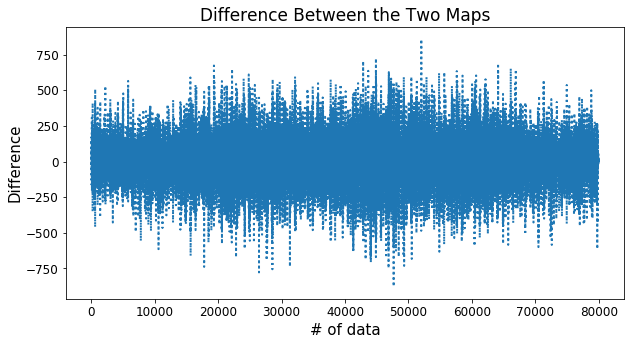

In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

file1 = '/home/jovyan/work/notes/dem_subset.tif'
file2 = '/home/jovyan/work/notes/dem_subset_reproduced.tif'
file3 = '/home/jovyan/work/notes/dem_subset_mollweide.tif'
fp1 = rasterio.open(file1)
fp2 = rasterio.open(file2)
fp3 = rasterio.open(file3)
dem1 = fp1.read(1)
dem2 = fp2.read(1)
#print(dem1)
#print(dem2)
dem3 = dem2.ravel() - dem1.ravel()

def calculate_bias(x,y):
    return np.mean(np.abs(x - y))
print('BIAS:', calculate_bias(dem2, dem1))

def calculate_rmse(x,y):
    return np.mean((x - y)**2)**0.5
print('RMSE:', calculate_rmse(dem2, dem1))

plt.figure(figsize = (10, 5))
plt.plot(dem3, linewidth=2, linestyle=":")
plt.title('Difference Between the Two Maps', fontsize = 17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('# of data',fontsize=15)
plt.ylabel('Difference',fontsize=15)

print('During the subsetting and reprojecting processes, the data maybe influenced and thus become slightly different. Therefore, to make the data to be as accurate as possible, we should always try to minimize the number of times of subsetting or reprojecting. The step that could be taken is to make the whole data transform process as simple as possible, and reproject and subset as less as possible.')

# 4. Rotating globe + precipitation (25 pts)

Following the example of rotating globe that was shown in Lecture 9, produce a rotating globe that shows time varying maps of precipitation on the globe. You will want to use precipitation from `/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann`. The variable name is `precip`. Feel free to use whatever frequency of rotation of the globe that you wish. 

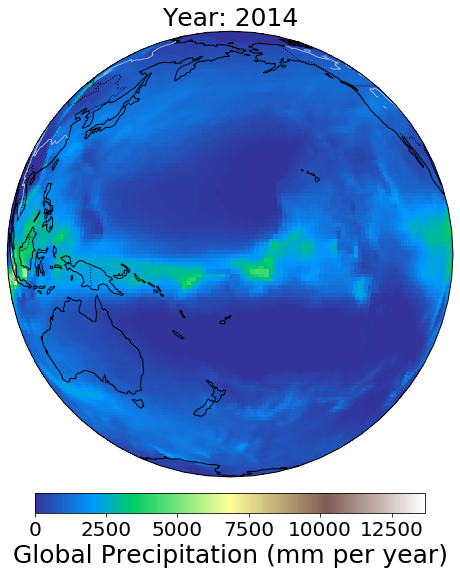

In [8]:
import numpy as np
import datetime as datetime
import netCDF4 as nc
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.pyplot as plt
import cartopy

file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann'
fp = nc.Dataset(file)
data = fp['precip'][:, :, :]
times = fp['time']
dates = nc.num2date(times[:],units=times.units,calendar=times.calendar)
fp.close()

udata = []
for year in range(1979,2015):
    m = (dates >= datetime.datetime(year,7,1,6)) & (dates <= datetime.datetime(year,7,1,6))
    udata.append(np.mean(data[m,:,:],axis=0))
udata = 365*np.array(udata)

img_extent = (-180,180,-90,90)
fig = plt.figure(figsize=(10,10))
vmin = np.min(udata)
vmax = np.max(udata)
nframes = len(dates)-1

def animate(i):
    plt.clf()
    ax = plt.axes(projection=cartopy.crs.Orthographic(central_longitude=np.linspace(-180,180,nframes)[i]))
    im = plt.imshow(udata[i, :, :], vmin=vmin, vmax=vmax,
                    transform=cartopy.crs.PlateCarree(),
                    cmap=plt.get_cmap('terrain'),extent=(img_extent))
    plt.xticks([])
    plt.yticks([])
    plt.title('Year: %04d' % (dates[i].year,),fontsize=25)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
    ax.add_feature(cartopy.feature.RIVERS)
    cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.7,pad=0.03)
    cb.ax.tick_params(labelsize=20)
    cb.ax.set_xlabel(r'Global Precipitation (mm per year)',fontsize=25)
    return (im,)

anim = animation.FuncAnimation(fig, animate,frames=nframes, interval=500, blit=True)

HTML(anim.to_html5_video())